In [31]:
import numpy as np
from matplotlib import pyplot as plt
# from google.colab import files

In [32]:
# pontos de integração e pesos para o método de quadratura de gauss
data = {
    1: [(-np.sqrt(3)/3, 1),
        (np.sqrt(3)/3, 1)],

    2: [(-np.sqrt(3)/np.sqrt(5), 5/9),
        (0, 8/9),
        (np.sqrt(3)/np.sqrt(5), 5/9)],

    3: [(-np.sqrt((3/7) + (2/7)*(np.sqrt(6/5))), (18 - np.sqrt(30))/36),
        (-np.sqrt((3/7) - (2/7)*(np.sqrt(6/5))), (18 + np.sqrt(30))/36),
        (np.sqrt((3/7) - (2/7)*(np.sqrt(6/5))), (18 + np.sqrt(30))/36),
        (np.sqrt((3/7) + (2/7)*(np.sqrt(6/5))), (18 - np.sqrt(30))/36)],

    4: [(-(1/3)*np.sqrt(5 + 2*(np.sqrt(10/7))), (322 - 13*np.sqrt(70))/900),
        (-(1/3)*np.sqrt(5 - 2*(np.sqrt(10/7))), (322 + 13*np.sqrt(70))/900),
        (0, 128/225),
        ((1/3)*np.sqrt(5 - 2*(np.sqrt(10/7))), (322 + 13*np.sqrt(70))/900),
        ((1/3)*np.sqrt(5 + 2*(np.sqrt(10/7))), (322 - 13*np.sqrt(70))/900)]
}

In [33]:
def gauss_inter(a, b, t, f):
  return f(t)*(b-a)/2

In [34]:
def shg(index, t, degree):
  index += 1
  if degree == 1:
    if index == 1:
      return (1 - t)/2
    elif index == 2:
      return (1 + t)/2

  elif degree == 2:
    if index == 1:
      return t*(t - 1)/2
    elif index == 2:
      return -(t - 1)*(t + 1)
    elif index == 3:
      return t*(t + 1)/2

  elif degree == 3:
    if index == 1:
      return (t + (1/3))*(t - (1/3))*(t - 1)*(-9/16)
    elif index == 2:
      return (t + 1)*(t - (1/3))*(t - 1)*(27/16)
    elif index == 3:
      return (t + 1)*(t + (1/3))*(t - 1)*(-27/16)
    elif index == 4:
      return (t + 1)*(t + (1/3))*(t - (1/3))*(9/16)

  elif degree == 4:
    if index == 1:
      return (t + (1/2))*t*(t - (1/2))*(t - 1)*(2/3)
    elif index == 2:
      return (t + 1)*t*(t - (1/2))*(t - 1)*(-8/3)
    elif index == 3:
      return (t + 1)*(t + (1/2))*(t - (1/2))*(t - 1)*4
    elif index == 4:
      return (t + 1)*(t + (1/2))*t*(t - 1)*(-8/3)
    elif index == 5:
      return (t + 1)*(t + (1/2))*t*(t - (1/2))*(2/3)

In [35]:
def x_t(t, x_1, x_2):
  return t*(x_2 - x_1)/2 + (x_1 + x_2)/2

In [36]:
def f_u(t, x_1, x_2): # passa para o intervalo da malha
  return np.sin(np.pi * x_t(t, x_1, x_2))**2

# Questão 1

In [37]:
degrees = [1, 2, 3, 4]
xi = -2
xf = 2

In [38]:
def l2_proj(degrees):
  n_values = [4**i for i in range(1, 6)]
  print(n_values)
  for nel in n_values:

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    for idx, grau in enumerate(degrees):

        nint = grau + 1
        nen = nint

        x = np.linspace(xi, xf, nel*grau + 1)

        mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
        F_fonte = np.zeros(nel*grau + 1)

        data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

        index = 0
        h = x[grau] - x[0]

        for n in range(0, nel):

            Me = np.zeros((nint, nint))
            Fe = np.zeros(nint)

            for l in range(0, nint):

                for j in range(0, nen):

                    t, w = data_n[l]

                    Fe[j] += f_u(t, x[index], x[index+grau]) * shg(j, t, grau) * w * h/2

                    for i in range(0, nen):
                        Me[i, j] += shg(i, t, grau) * shg(j, t, grau) * w * h/2

            for k in range(0, nint):

                F_fonte[index+k] += Fe[k]

                for p in range(0, nint):
                    mat_M[index+k, index+p] += Me[k, p]

            index += grau

        solucao = np.linalg.solve(mat_M, F_fonte)


        axs[idx].plot(x, solucao, '.', label='aproximacao L2')
        axs[idx].plot(np.linspace(xi, xf, 10000), np.sin(np.pi * np.linspace(xi, xf, 10000))**2, label='analitica')
        axs[idx].set_title(f'Grau = {grau} - nel = {nel}')
        axs[idx].grid(True)
    plt.savefig('grafico_{}.png'.format(nel))
    # files.download('grafico_{}.png'.format(nel))
    plt.tight_layout()
    plt.legend(loc ="upper right")
    plt.show()

[4, 16, 64, 256, 1024]


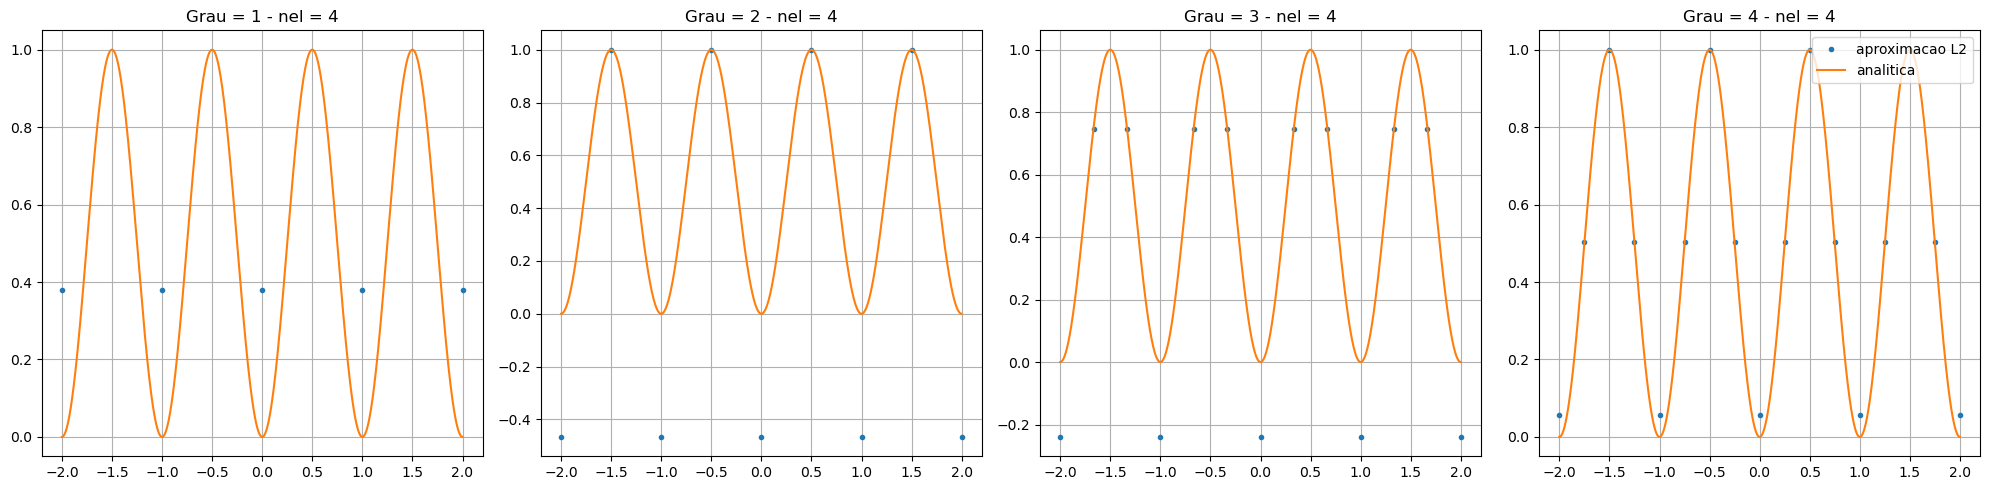

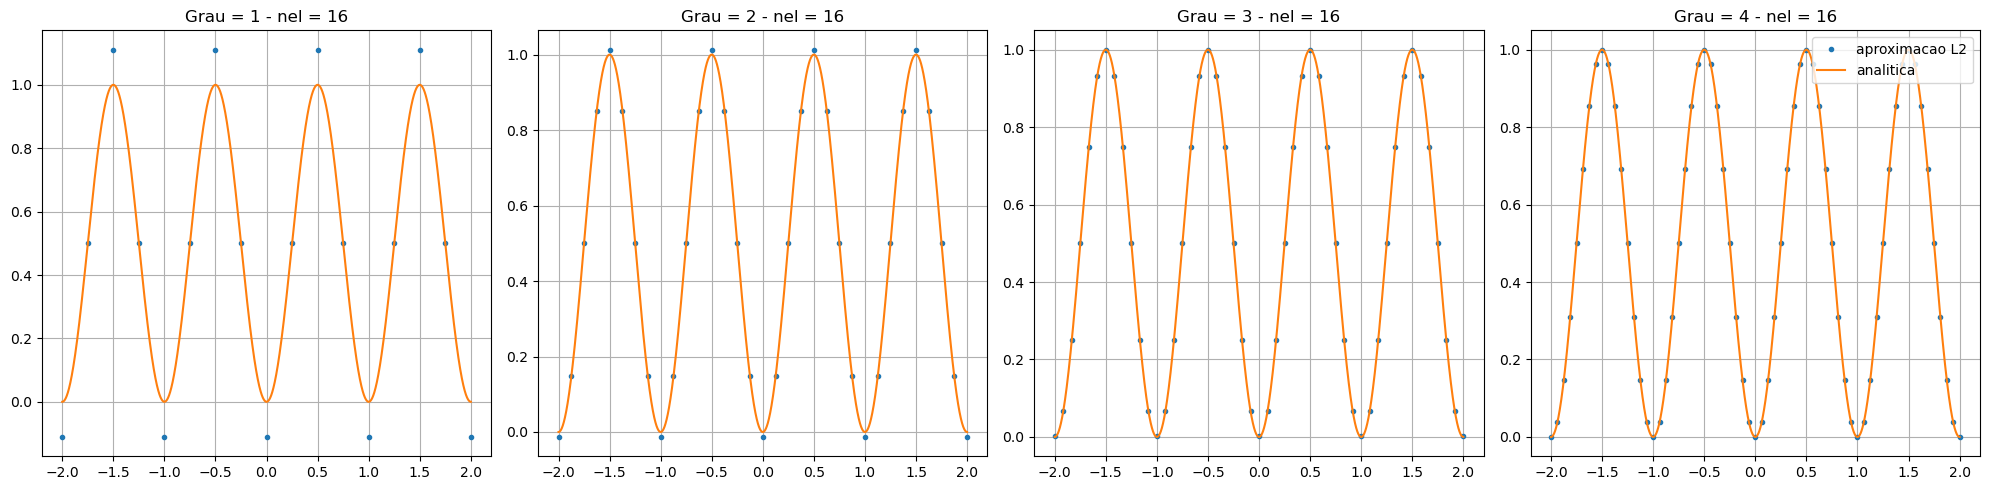

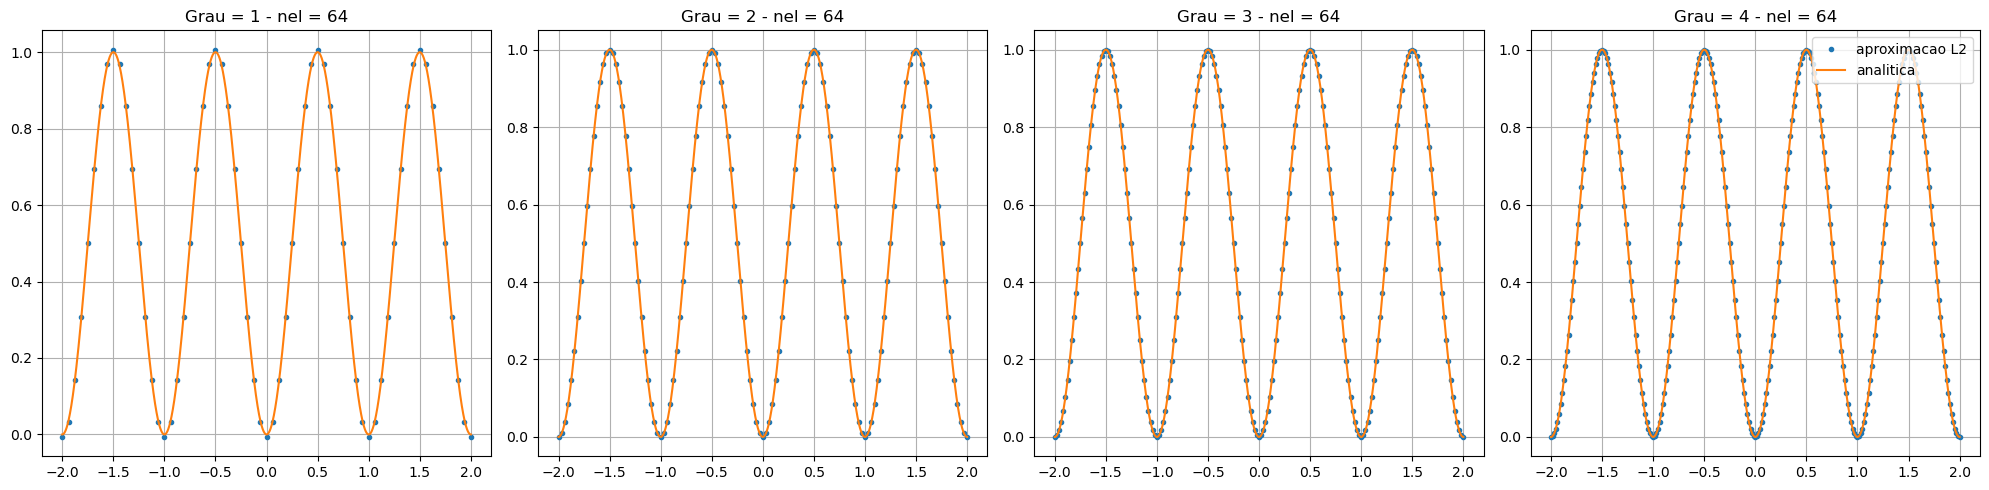

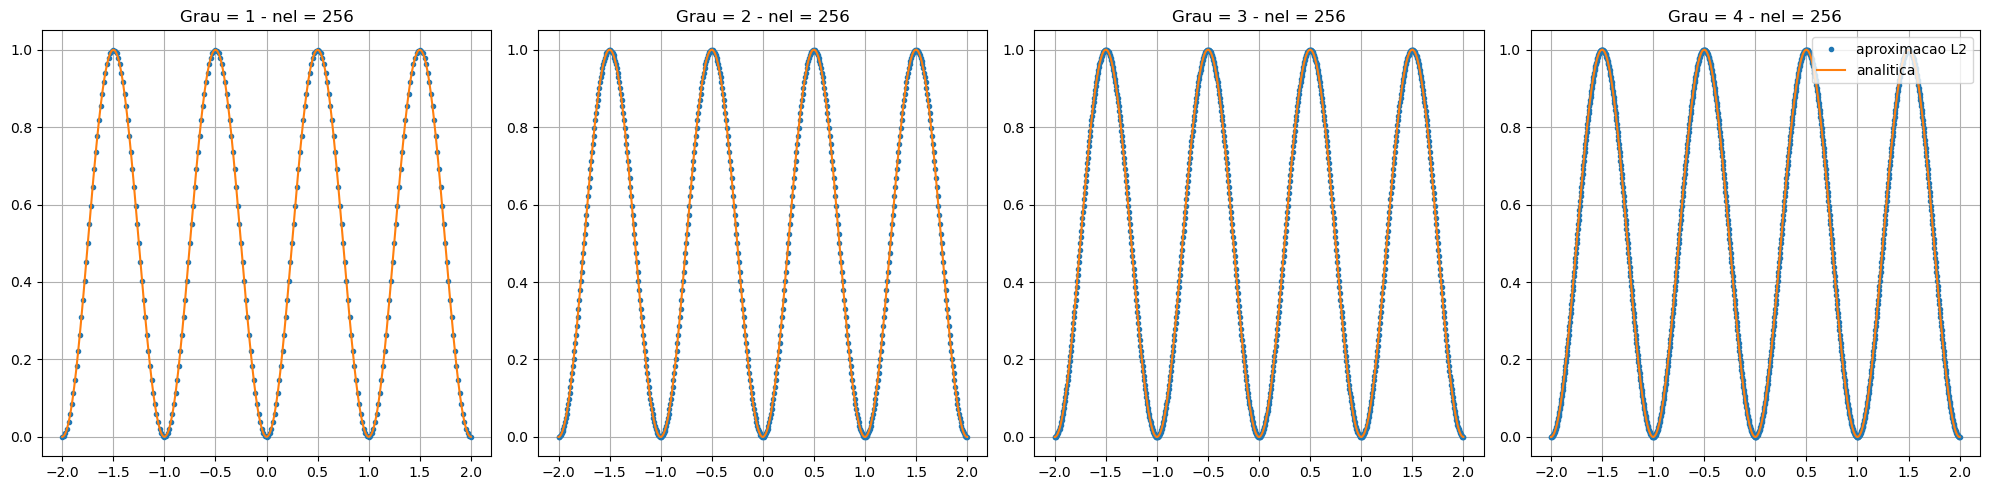

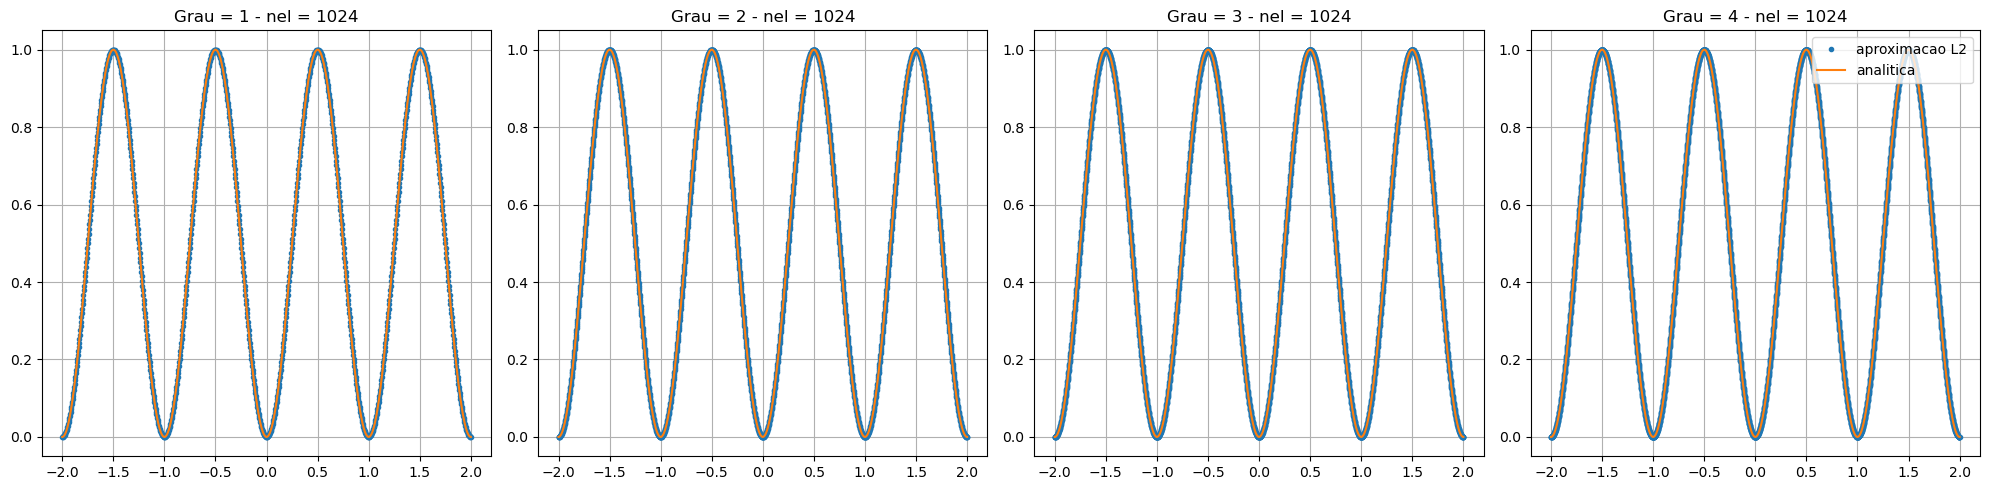

In [39]:
l2_proj([1,2,3,4])

In [40]:
def error_anal():
  n_values = [4**i for i in range(3, 6)]
  degrees = [1, 2, 3 , 4]

  erro = np.zeros((len(degrees), len(n_values)))
  erro_l2 = np.zeros((len(degrees), len(n_values)))
  h_values = np.zeros((len(degrees), len(n_values)))

  xi = -2
  xf = 2

  for idx_0, grau in enumerate(degrees):


      # Loop sobre os valores de nel
      for idx_1, nel in enumerate(n_values):

          nint = grau + 1
          nen = nint

          x = np.linspace(xi, xf, nel*grau + 1)

          mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
          F_fonte = np.zeros(nel*grau + 1)

          data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

          index = 0
          h = x[grau] - x[0]
          h_values[idx_0, idx_1] = h

          for n in range(0, nel):

              Me = np.zeros((nint, nint))
              Fe = np.zeros(nint)

              for l in range(0, nint):

                  for j in range(0, nen):

                      t, w = data_n[l]

                      Fe[j] += f_u(t, x[index], x[index+grau]) * shg(j, t, grau) * w * h/2

                      for i in range(0, nen):
                          Me[i, j] += shg(i, t, grau) * shg(j, t, grau) * w * h/2

              for k in range(0, nint):

                  F_fonte[index+k] += Fe[k]

                  for p in range(0, nint):
                      mat_M[index+k, index+p] += Me[k, p]

              index += grau

          solucao = np.linalg.solve(mat_M, F_fonte)
          exata = np.sin(np.pi * np.linspace(xi, xf, len(solucao)))**2

          # erro da norma do máximo
          erro[idx_0, idx_1] = np.amax(np.abs(solucao - exata))

          # erro da norma L2
          erul_2 = 0
          index = 0
          for n in range(0, nel):

              eru = 0

              for l in range(0, nint):

                  exat = exata[index + l]
                  uh = solucao[index + l]

                  t, w = data_n[l]

                  eru += ((exat - uh)**2)*w

              index += grau

              erul_2+=eru

          erul_2 = np.sqrt(erul_2)
          erro_l2[idx_0, idx_1] = erul_2

  plt.figure(figsize=(15, 10))
  plt.title("Taxa de convergência pela norma L2")
  plt.xlabel("-log( h )")
  plt.ylabel("log( erro )")

  coeficientes_angulares = []

  for i in range(len(degrees)):
      plt.plot(-np.log10(h_values[i]), np.log10(erro_l2[i]), '-v')

      # Calcula o coeficiente angular (inclinação) da reta usando polyfit
      coef_angular = np.polyfit(-np.log10(h_values[i]), np.log10(erro_l2[i]), 1)[0]
      coeficientes_angulares.append(np.abs(coef_angular))

      # Adiciona o coeficiente angular como texto próximo ao ponto final da reta
      plt.text(-np.log10(h_values[i])[-1], np.log10(erro_l2[i])[-1], f'degree {i+1} Abs Coef: {coeficientes_angulares[i]:.0f}', fontsize=10)


  plt.grid(True)
  plt.legend()
  plt.savefig('convergencia_l2.png')
  # files.download('convergencia_l2.png')
  plt.show()

  plt.figure(figsize=(15, 10))
  plt.title("Taxa de convergência pela norma do max")
  plt.xlabel("-log( h )")
  plt.ylabel("log( erro )")

  coeficientes_angulares = []

  for i in range(len(degrees)):
      plt.plot(-np.log10(h_values[i]), np.log10(erro[i]), '-v')

      # Calcula o coeficiente angular (inclinação) da reta usando polyfit
      coef_angular = np.polyfit(-np.log10(h_values[i]), np.log10(erro[i]), 1)[0]
      coeficientes_angulares.append(np.abs(coef_angular))

      # Adiciona o coeficiente angular como texto próximo ao ponto final da reta
      plt.text(-np.log10(h_values[i])[-1], np.log10(erro[i])[-1], f'degree {i+1} Abs Coef: {coeficientes_angulares[i]:.0f}', fontsize=10)


  plt.grid(True)
  plt.savefig('convergencia_max.png')
  # files.download('convergencia_max.png')
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


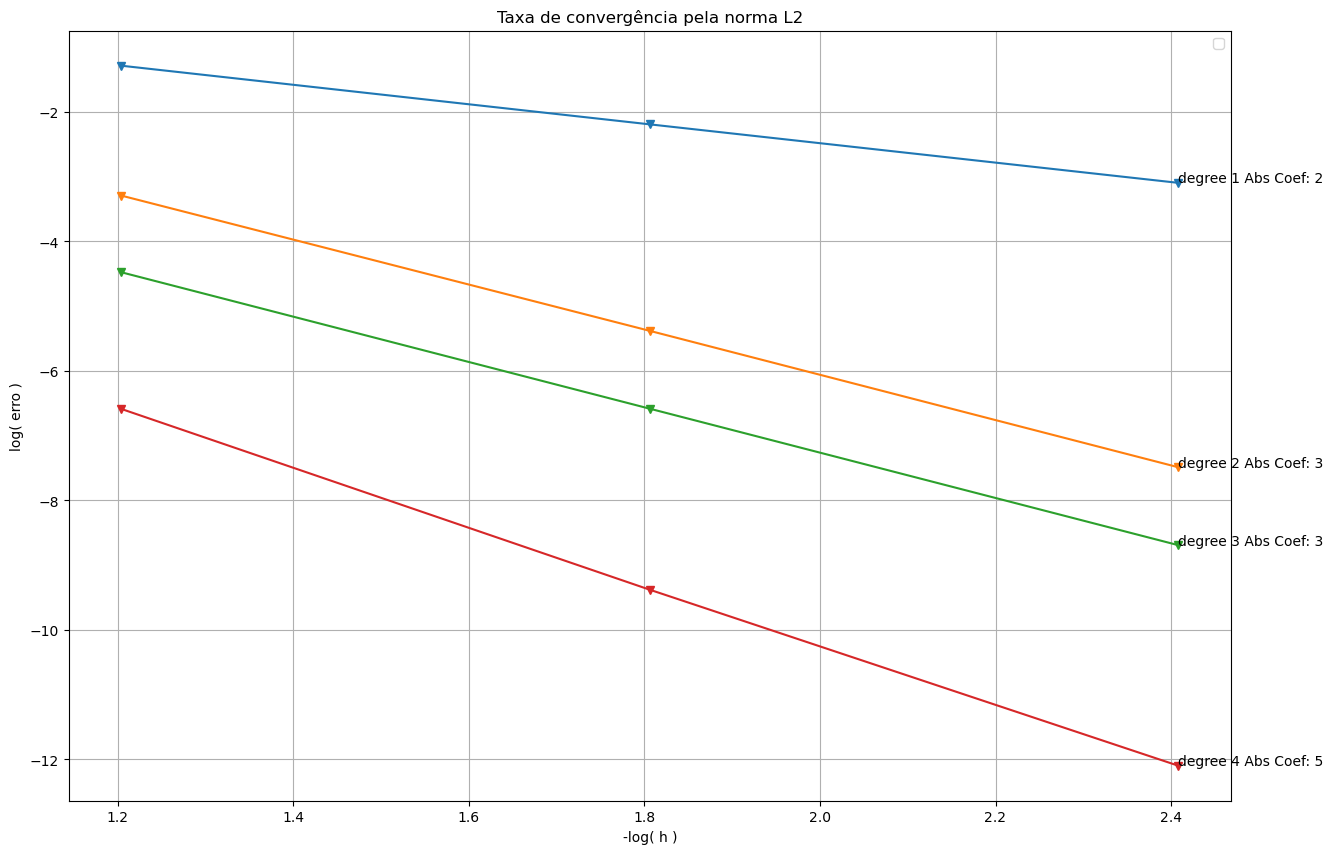

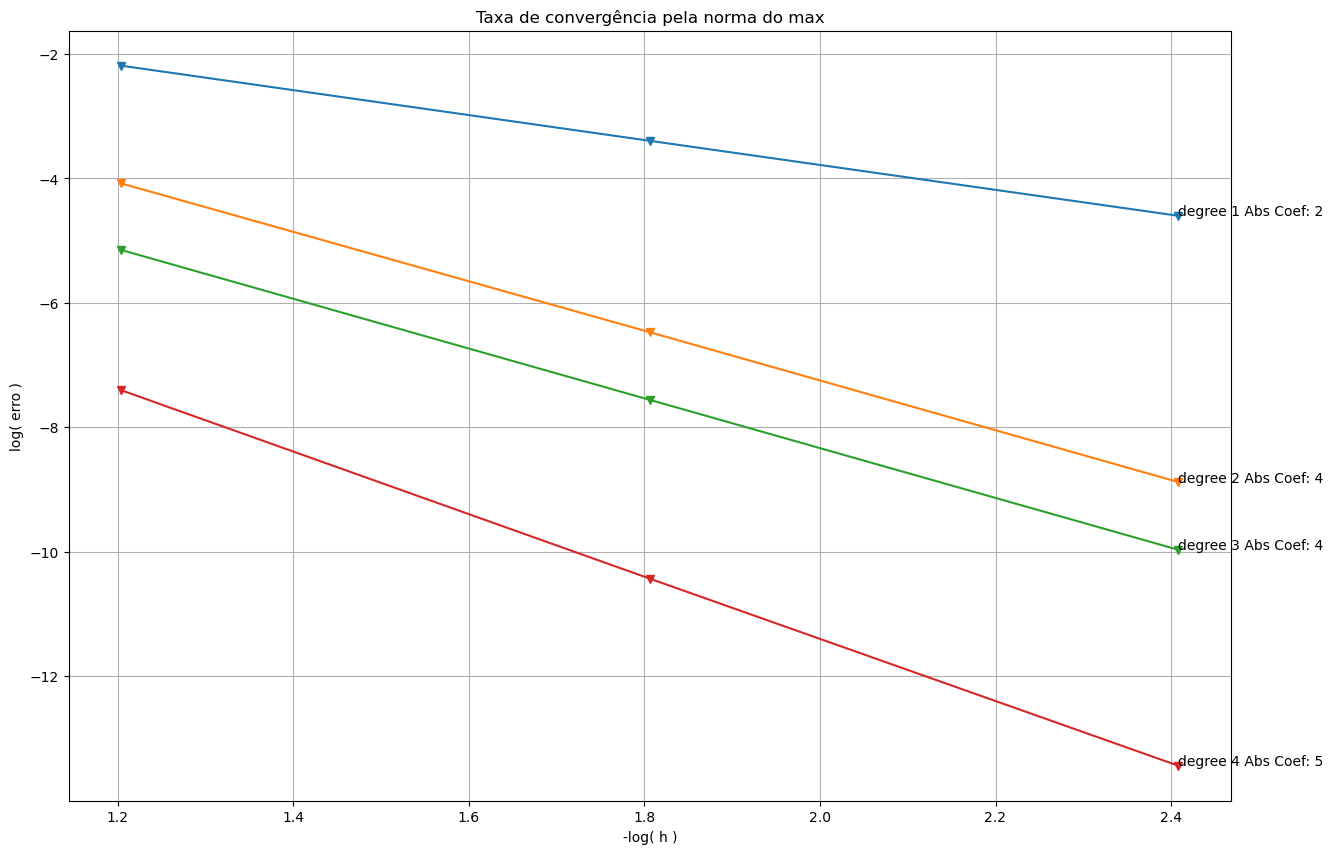

In [41]:
error_anal()

# Questão 2

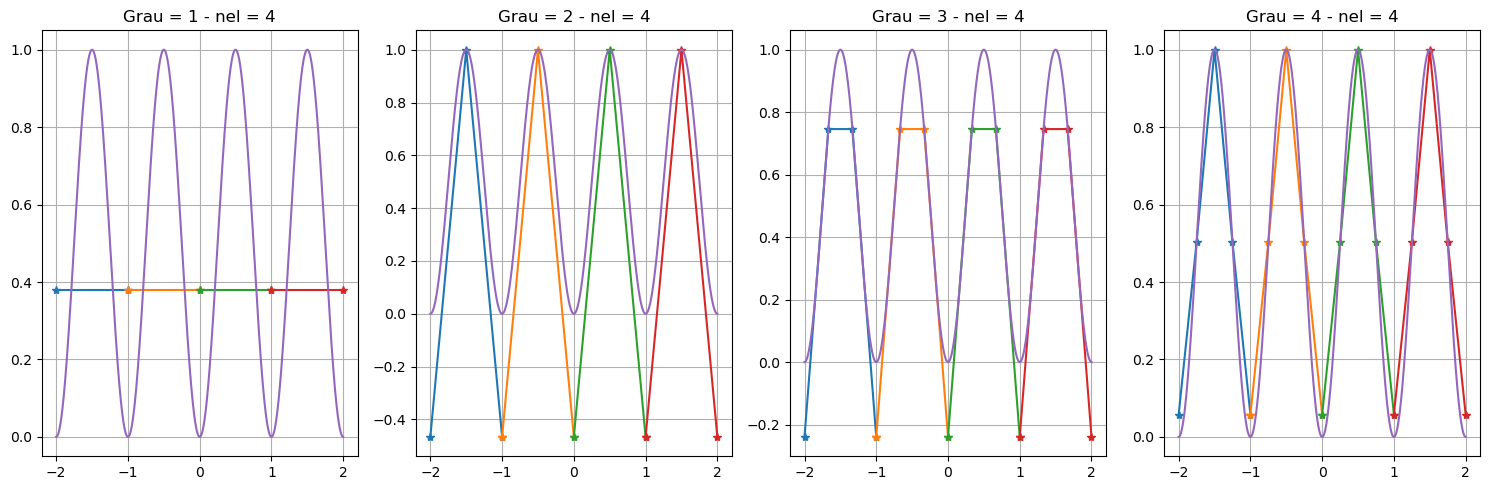

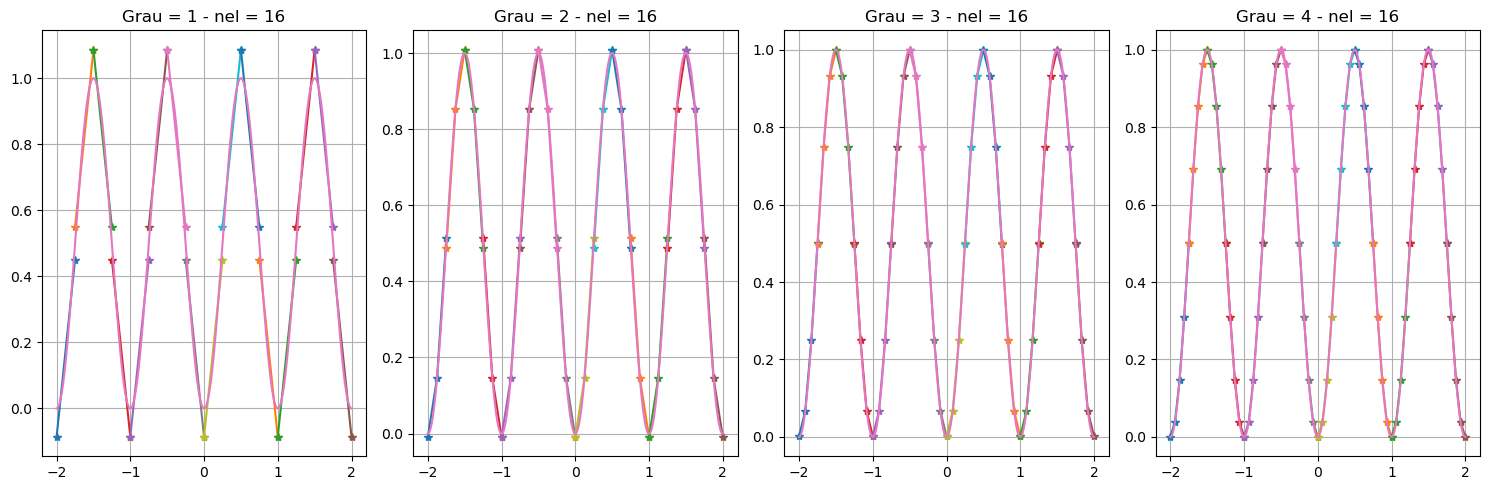

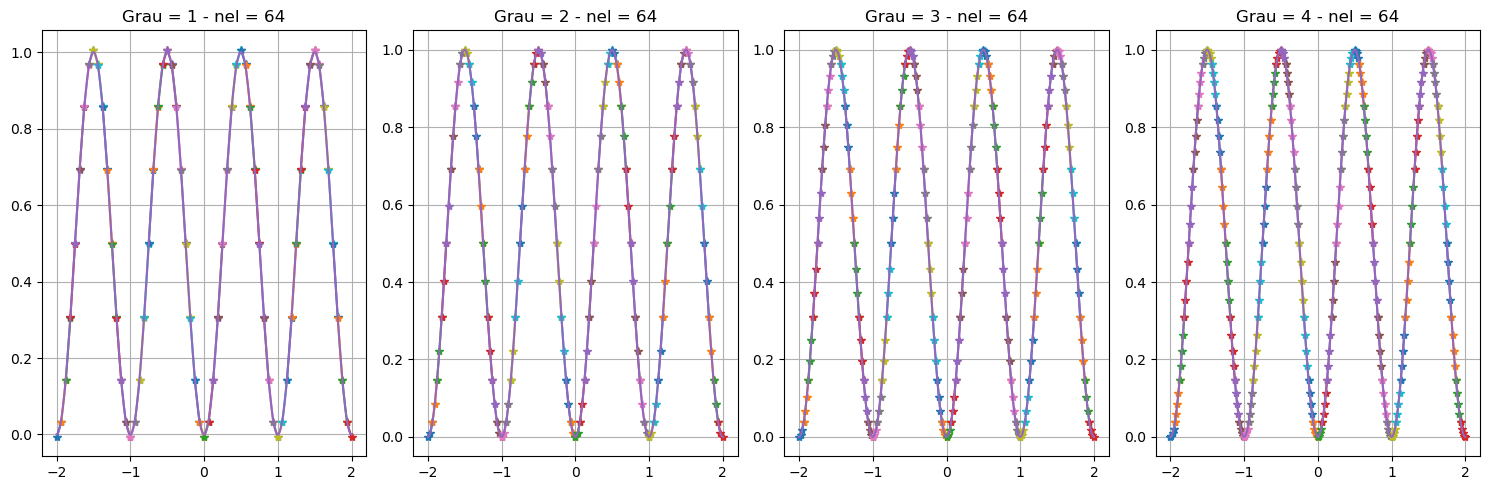

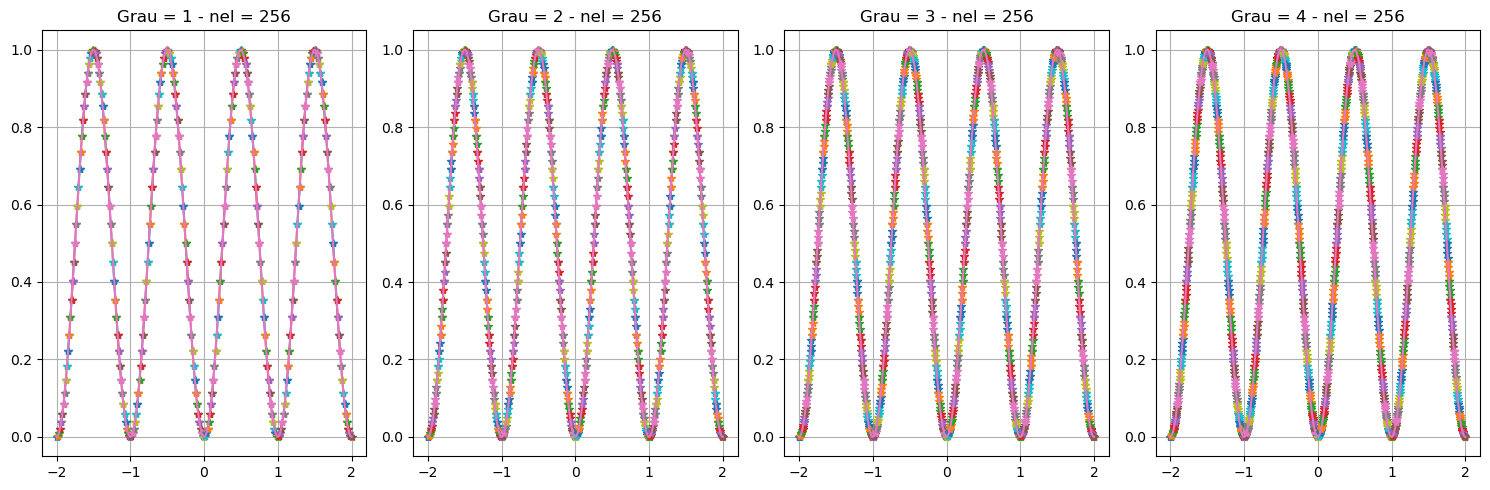

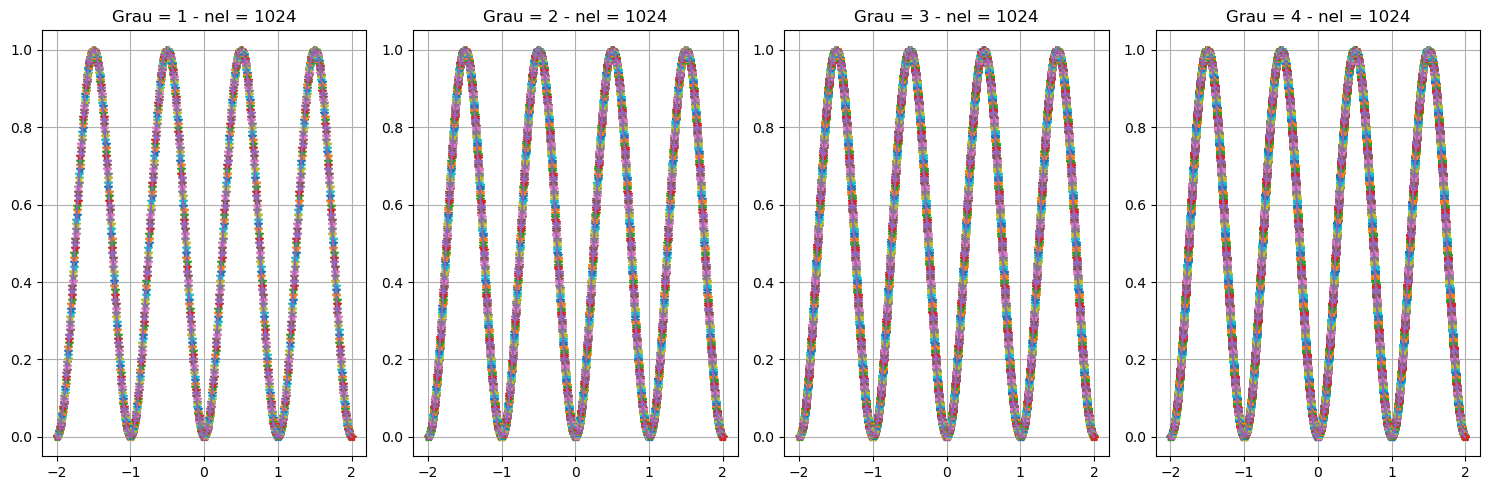

In [42]:
n_values = [4**i for i in range(1, 6)]
grau_values = [1, 2, 3 , 4]

xi = -2
xf = 2

for nel in n_values:

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))

    for idx, grau in enumerate(grau_values):

        nint = grau + 1
        nen = nint

        x = np.linspace(xi, xf, nel*grau + 1)

        mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
        F_fonte = np.zeros(nel*grau + 1)

        data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

        index = 0
        h = x[grau] - x[0]

        for n in range(0, nel):

            Me = np.zeros((nint, nint))
            Fe = np.zeros(nint)

            for l in range(0, nint):

              for j in range(0, nen):

                t, w = data_n[l]

                Fe[j] += f_u(t, x[index], x[index+grau]) * shg(j, t, grau) * w * h/2

                for i in range(0, nen):
                  Me[i, j] += shg(i, t, grau) * shg(j, t, grau) * w * h/2

            axs[idx].plot(x[index : index + nint], np.linalg.solve(Me, Fe), "-*")

            index+=grau


        axs[idx].plot(np.linspace(xi, xf, 10000), np.sin(np.pi * np.linspace(xi, xf, 10000))**2)
        axs[idx].set_title(f'Grau = {grau} - nel = {nel}')
        axs[idx].grid(True)

    plt.tight_layout()
    plt.savefig('grafico_descontinuo_{}.png'.format(nel))
    # files.download('grafico_descontinuo_{}.png'.format(nel))
    plt.show()

In [43]:
n_values = [4**i for i in range(3, 6)]
grau_values = [1, 2, 3 , 4]

erro = np.zeros((len(grau_values), len(n_values)))
erro_l2 = np.zeros((len(grau_values), len(n_values)))
h_values = np.zeros((len(grau_values), len(n_values)))

xi = -2
xf = 2

for idx_1, nel in enumerate(n_values):

    for idx_0, grau in enumerate(grau_values):

        nint = grau + 1
        nen = nint

        x = np.linspace(xi, xf, nel*grau + 1)

        mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
        F_fonte = np.zeros(nel*grau + 1)

        data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

        index = 0
        h = x[grau] - x[0]
        h_values[idx_0, idx_1] = h

        # erro da norma L2
        erul_2 = 0
        index_L2 = 0

        for n in range(0, nel):

            Me = np.zeros((nint, nint))
            Fe = np.zeros(nint)

            eru = 0

            for l in range(0, nint):

              for j in range(0, nen):

                t, w = data_n[l]

                Fe[j] += f_u(t, x[index], x[index+grau]) * shg(j, t, grau) * w * h/2

                for i in range(0, nen):
                  Me[i, j] += shg(i, t, grau) * shg(j, t, grau) * w * h/2


            solucao_elemento = np.linalg.solve(Me, Fe)
            exata_elemento = np.sin(np.pi * x[index : index + nint])**2

            for l in range(0, nint):

                exat = exata_elemento[l]
                uh = solucao_elemento[l]

                t, w = data_n[l]

                eru += ((exat - uh)**2)*w

            erul_2+=eru

            erro[idx_0, idx_1] = np.amax(np.abs(solucao_elemento - exata_elemento))
            index+=grau

        erul_2 = np.sqrt(erul_2)
        erro_l2[idx_0, idx_1] = erul_2

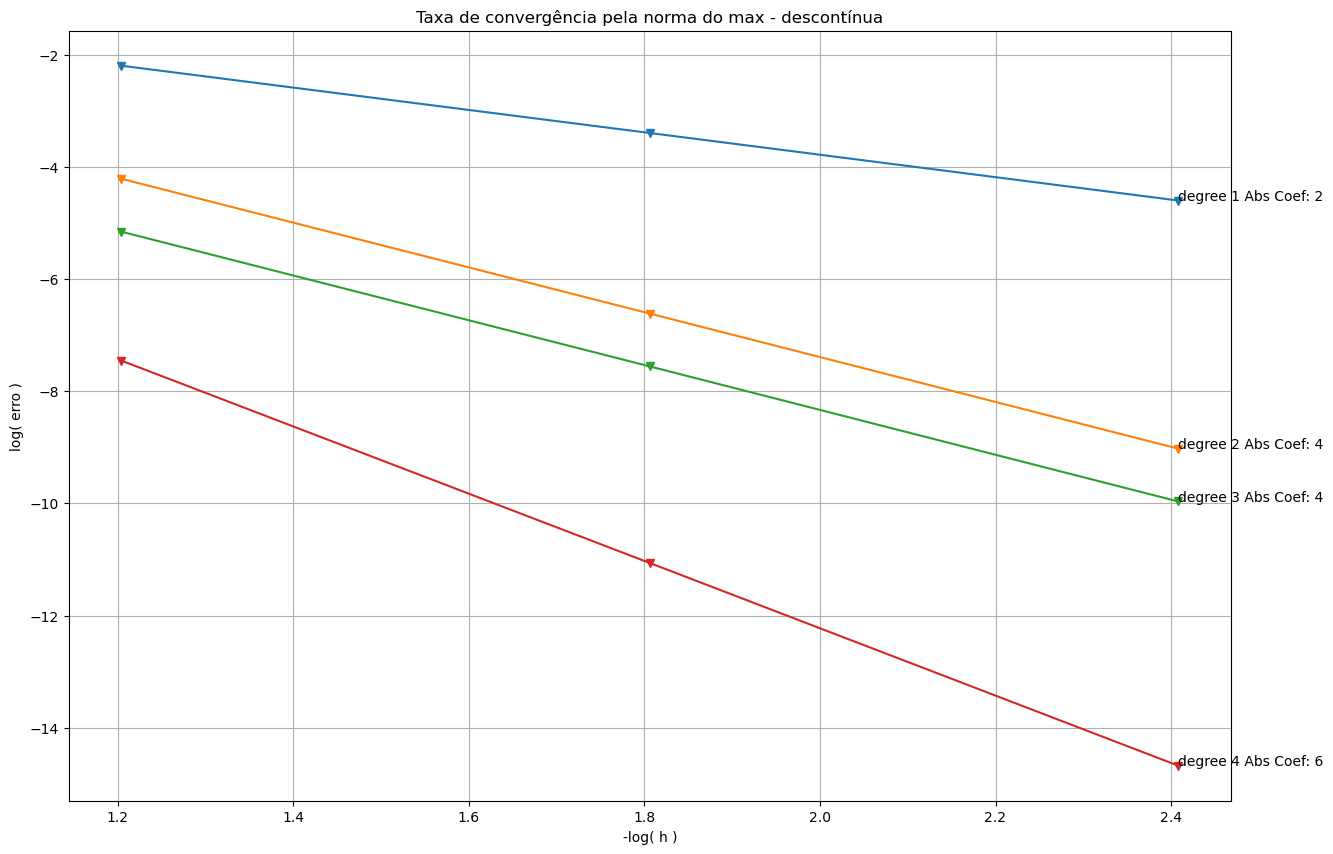

In [44]:
plt.figure(figsize=(15, 10))
plt.title("Taxa de convergência pela norma do max - descontínua")
plt.xlabel("-log( h )")
plt.ylabel("log( erro )")

coeficientes_angulares = []

for i in range(len(grau_values)):
    plt.plot(-np.log10(h_values[i]), np.log10(erro[i]), '-v')

    # Calcula o coeficiente angular (inclinação) da reta usando polyfit
    coef_angular = np.polyfit(-np.log10(h_values[i]), np.log10(erro[i]), 1)[0]
    coeficientes_angulares.append(np.abs(coef_angular))

    # Adiciona o coeficiente angular como texto próximo ao ponto final da reta
    plt.text(-np.log10(h_values[i])[-1], np.log10(erro[i])[-1], f'degree {i+1} Abs Coef: {coeficientes_angulares[i]:.0f}', fontsize=10)


plt.grid(True)
plt.savefig('desconti_max.png')
# files.download('desconti_max.png')
plt.show()

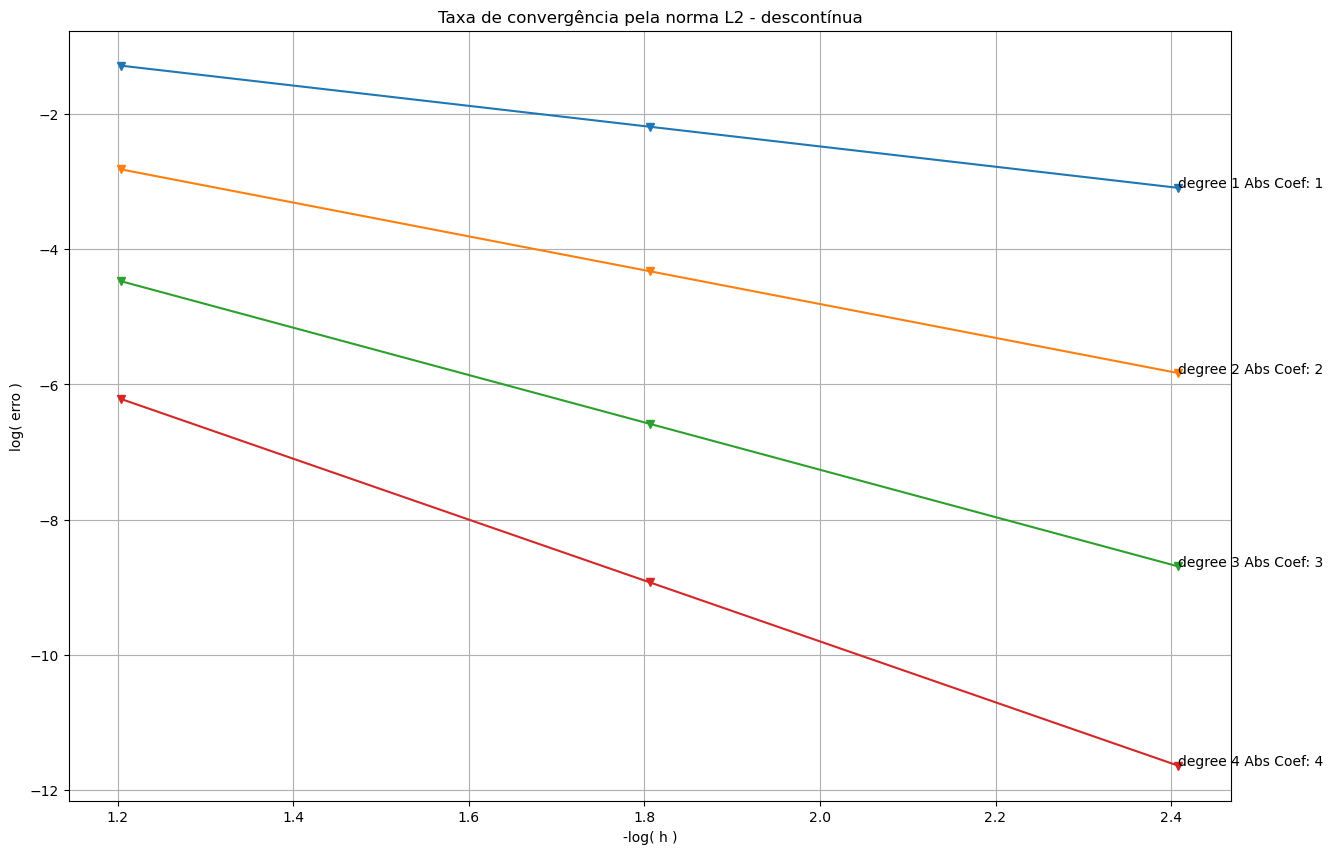

In [45]:
plt.figure(figsize=(15, 10))
plt.title("Taxa de convergência pela norma L2 - descontínua")
plt.xlabel("-log( h )")
plt.ylabel("log( erro )")

coeficientes_angulares = []

for i in range(len(grau_values)):
    plt.plot(-np.log10(h_values[i]), np.log10(erro_l2[i]), '-v')

    # Calcula o coeficiente angular (inclinação) da reta usando polyfit
    coef_angular = np.polyfit(-np.log10(h_values[i]), np.log10(erro_l2[i]), 1)[0]
    coeficientes_angulares.append(np.abs(coef_angular))

    # Adiciona o coeficiente angular como texto próximo ao ponto final da reta
    plt.text(-np.log10(h_values[i])[-1], np.log10(erro_l2[i])[-1], f'degree {i+1} Abs Coef: {coeficientes_angulares[i]:.0f}', fontsize=10)


plt.grid(True)
plt.savefig('desconti_l2.png')
# files.download('desconti_l2.png')
plt.show()